# Bayesian Learning Example

Some basic examples of the Bayesian rule with two neuron ensembles. The Bayesian rule adjusts the weights between the ensembles to learn a simple input function over time.


In [1]:
import nengo
from nengo.processes import WhiteSignal
import numpy as np
import matplotlib.pyplot as plt
from learning_rules import Bayesian


### Sinusoidal input signal


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:22.                                                 


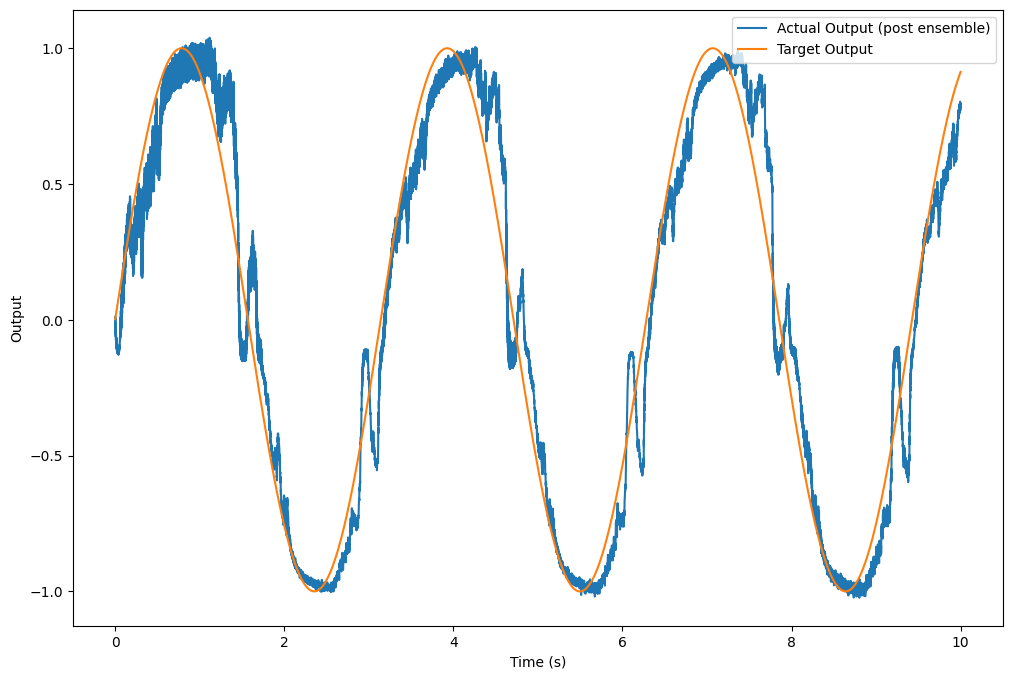

In [2]:
n_a = 100
n_b = 200

# set estimates for priors
prior_mean = np.full((n_b, n_a), 0.5)
prior_variance = np.full((n_b, n_a), 2.0)

with nengo.Network() as model:
    # sine inpout signal
    stim = nengo.Node(lambda t: np.sin(2*t), size_out=1)

    pre = nengo.Ensemble(n_neurons=n_a, dimensions=1) 
    post = nengo.Ensemble(n_neurons=n_b, dimensions=1)

    # connect input to ens_a
    nengo.Connection(stim, pre)

    conn = nengo.Connection(
        pre,
        post,
        function=lambda x: [0],
        solver=nengo.solvers.Lstsq(weights=True),
        learning_rule_type=Bayesian(
            prior_mean,
            prior_variance,
        ),
    )

    error = nengo.Ensemble(100, dimensions=1)

    # error = target - actual = pre - post
    nengo.Connection(pre, error)
    nengo.Connection(post, error, transform=-1)

    # connect the error into the learning rule
    nengo.Connection(error, conn.learning_rule)

    stim_probe = nengo.Probe(stim)
    pre_probe = nengo.Probe(pre, synapse=0.01)
    post_probe = nengo.Probe(post, synapse=0.01)
    error_probe = nengo.Probe(error, synapse=0.01)

    mean_probe = nengo.Probe(conn.learning_rule, "mu")
    variance_probe = nengo.Probe(conn.learning_rule, "sigma2")
    weights_probe = nengo.Probe(conn, "weights")

with nengo.Simulator(model) as sim:
    sim.run(10.0)

time = sim.trange()
stim_data = sim.data[stim_probe]
pre_data = sim.data[pre_probe]
post_data = sim.data[post_probe]
error_data = sim.data[error_probe]
mean_data = sim.data[mean_probe]
variance_data = sim.data[variance_probe]

plt.figure(figsize=(12, 8))
plt.plot(time, post_data, label="Actual Output (post ensemble)")
plt.plot(time, stim_data, label="Target Output")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()

### Random white signal


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:14.                                                 


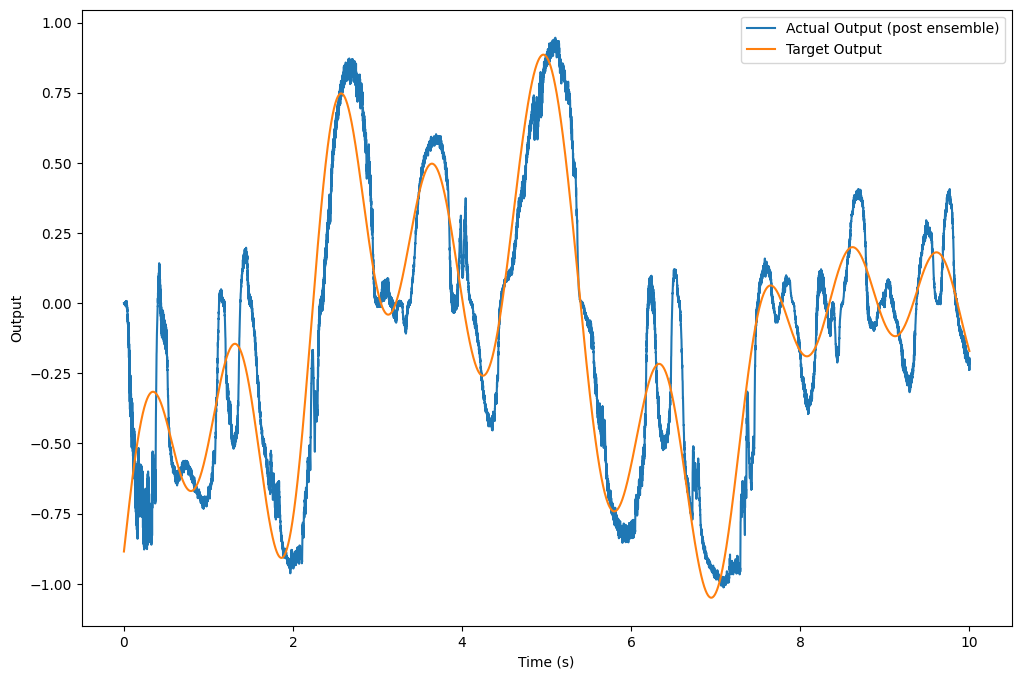

In [3]:
n_a = 100
n_b = 200

# set estimates for priors
prior_mean = np.full((n_b, n_a), 0.5)
prior_variance = np.full((n_b, n_a), 2.0)

with nengo.Network() as model:
    # input signal
    stim = nengo.Node(WhiteSignal(60, high=1), size_out=1)

    pre = nengo.Ensemble(n_neurons=n_a, dimensions=1) 
    post = nengo.Ensemble(n_neurons=n_b, dimensions=1)

    # connect input to ens_a
    nengo.Connection(stim, pre)

    conn = nengo.Connection(
        pre,
        post,
        function=lambda x: [0],
        solver=nengo.solvers.Lstsq(weights=True),
        learning_rule_type=Bayesian(
            prior_mean,
            prior_variance,
        )
    )

    error = nengo.Ensemble(100, dimensions=1)

    # error = target - actual = pre - post
    nengo.Connection(pre, error)
    nengo.Connection(post, error, transform=-1)

    # connect the error into the learning rule
    nengo.Connection(error, conn.learning_rule)

    stim_probe = nengo.Probe(stim)
    pre_probe = nengo.Probe(pre, synapse=0.01)
    post_probe = nengo.Probe(post, synapse=0.01)
    error_probe = nengo.Probe(error, synapse=0.01)

    mean_probe = nengo.Probe(conn.learning_rule, "mu")
    variance_probe = nengo.Probe(conn.learning_rule, "sigma2")
    weights_probe = nengo.Probe(conn, "weights")

with nengo.Simulator(model) as sim:
    sim.run(10.0)

time = sim.trange()
stim_data = sim.data[stim_probe]
pre_data = sim.data[pre_probe]
post_data = sim.data[post_probe]
error_data = sim.data[error_probe]
mean_data = sim.data[mean_probe]
variance_data = sim.data[variance_probe]

plt.figure(figsize=(12, 8))
plt.plot(time, post_data, label="Actual Output (post ensemble)")
plt.plot(time, stim_data, label="Target Output")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()

### Ramp input signal


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:29.                                                 


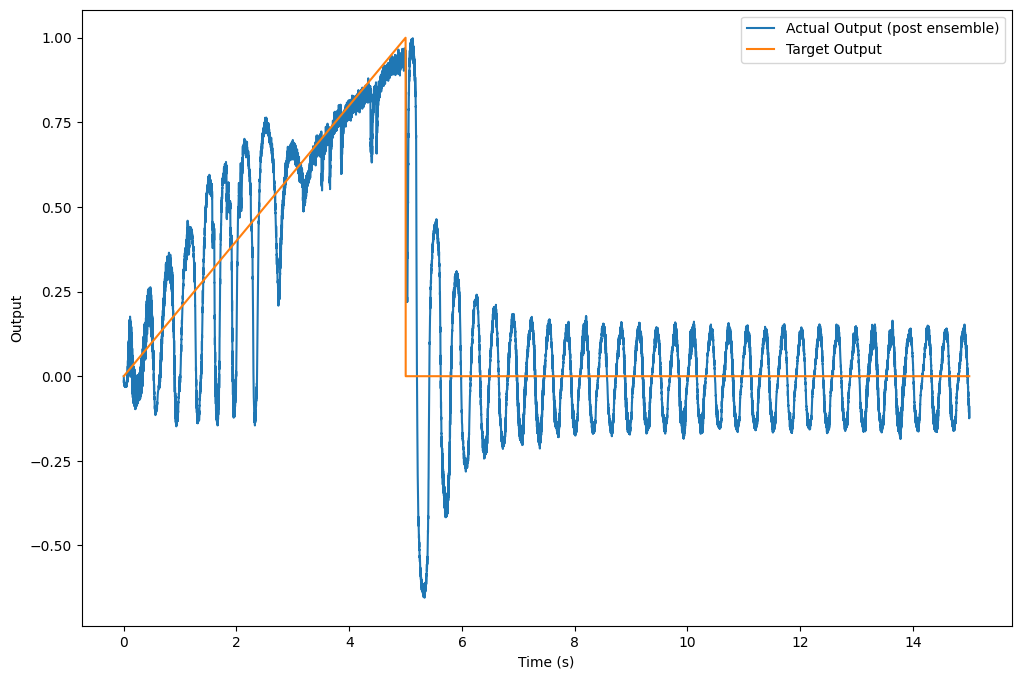

In [4]:
n_a = 100
n_b = 200

# set estimates for priors
prior_mean = np.full((n_b, n_a), 0.5)
prior_variance = np.full((n_b, n_a), 2.0)

with nengo.Network() as model:
    # ramp input signal
    stim = nengo.Node(nengo.processes.Piecewise({
        0: 0,
        5: 1
    }, interpolation='linear'), size_out=1)

    pre = nengo.Ensemble(n_neurons=n_a, dimensions=1) 
    post = nengo.Ensemble(n_neurons=n_b, dimensions=1)

    # connect input to ens_a
    nengo.Connection(stim, pre)

    conn = nengo.Connection(
        pre,
        post,
        function=lambda x: [0],
        solver=nengo.solvers.Lstsq(weights=True),
        learning_rule_type=Bayesian(
            prior_mean,
            prior_variance,
        )
    )

    error = nengo.Ensemble(100, dimensions=1)

    # error = target - actual = pre - post
    nengo.Connection(pre, error)
    nengo.Connection(post, error, transform=-1)

    # connect the error into the learning rule
    nengo.Connection(error, conn.learning_rule)

    stim_probe = nengo.Probe(stim)
    pre_probe = nengo.Probe(pre, synapse=0.01)
    post_probe = nengo.Probe(post, synapse=0.01)
    error_probe = nengo.Probe(error, synapse=0.01)

    mean_probe = nengo.Probe(conn.learning_rule, "mu")
    variance_probe = nengo.Probe(conn.learning_rule, "sigma2")
    weights_probe = nengo.Probe(conn, "weights")

with nengo.Simulator(model) as sim:
    sim.run(15.0)

time = sim.trange()
stim_data = sim.data[stim_probe]
pre_data = sim.data[pre_probe]
post_data = sim.data[post_probe]
error_data = sim.data[error_probe]
mean_data = sim.data[mean_probe]
variance_data = sim.data[variance_probe]

plt.figure(figsize=(12, 8))
plt.plot(time, post_data, label="Actual Output (post ensemble)")
plt.plot(time, stim_data, label="Target Output")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()